# Analysis of Global Video Game Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Data Cleaning

The dataset has a small number of missing values in the 'Year' and 'Publisher' columns (less than 2% of the total data). For this analysis, the simplest and most effective strategy is to drop these rows to ensure data integrity.

In [6]:
df.dropna(inplace=True)

In [7]:
df['Year'] = df['Year'].astype(int)

In [8]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Q1: Which gaming platform is the best-selling platform in history?

In [9]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
platform_sales

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64

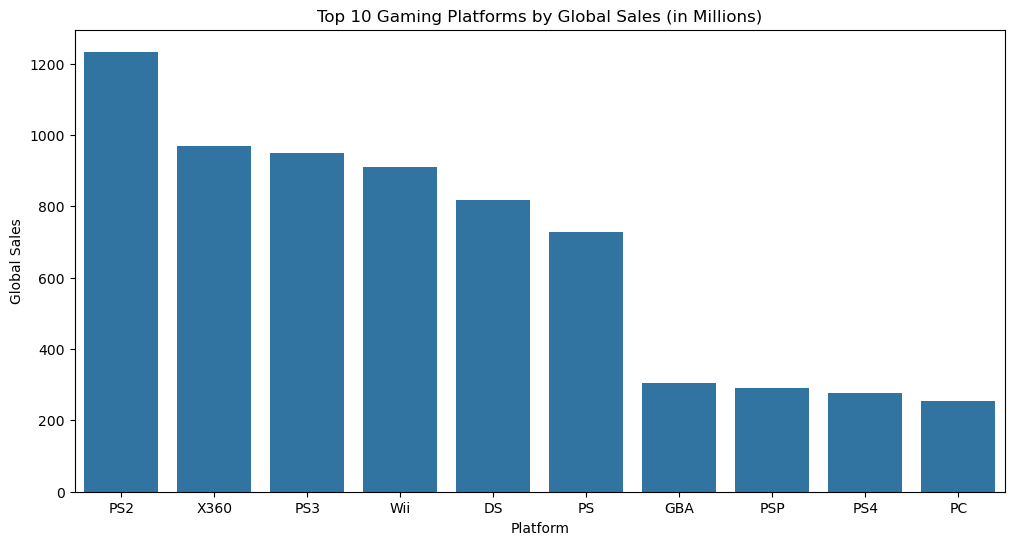

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Top 10 Gaming Platforms by Global Sales (in Millions)')
plt.ylabel('Global Sales')
plt.show()

> **Conclusion for Q1:**
> The analysis shows that the PlayStation 2 (PS2) is the best-selling platform of all time.

## Q2： What are the most popular gaming platforms in Europe and North America?

In [11]:
na_platform_sales = df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False).head(10)
eu_platform_sales = df.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False).head(10)

print("--- Top 10 Platform in North America (in Millions) ---")
print(na_platform_sales)

print("--- Top 10 Platform in Europe (in Millions) ---")
print(eu_platform_sales)

--- Top 10 Platform in North America (in Millions) ---
Platform
X360    594.33
PS2     572.92
Wii     497.37
PS3     388.90
DS      388.53
PS      334.71
XB      182.06
GBA     178.43
N64     138.91
GC      131.94
Name: NA_Sales, dtype: float64
--- Top 10 Platform in Europe (in Millions) ---
Platform
PS3     340.47
PS2     332.63
X360    278.00
Wii     264.35
PS      212.38
DS      194.05
PC      137.35
PS4     123.70
GBA      72.49
PSP      67.16
Name: EU_Sales, dtype: float64


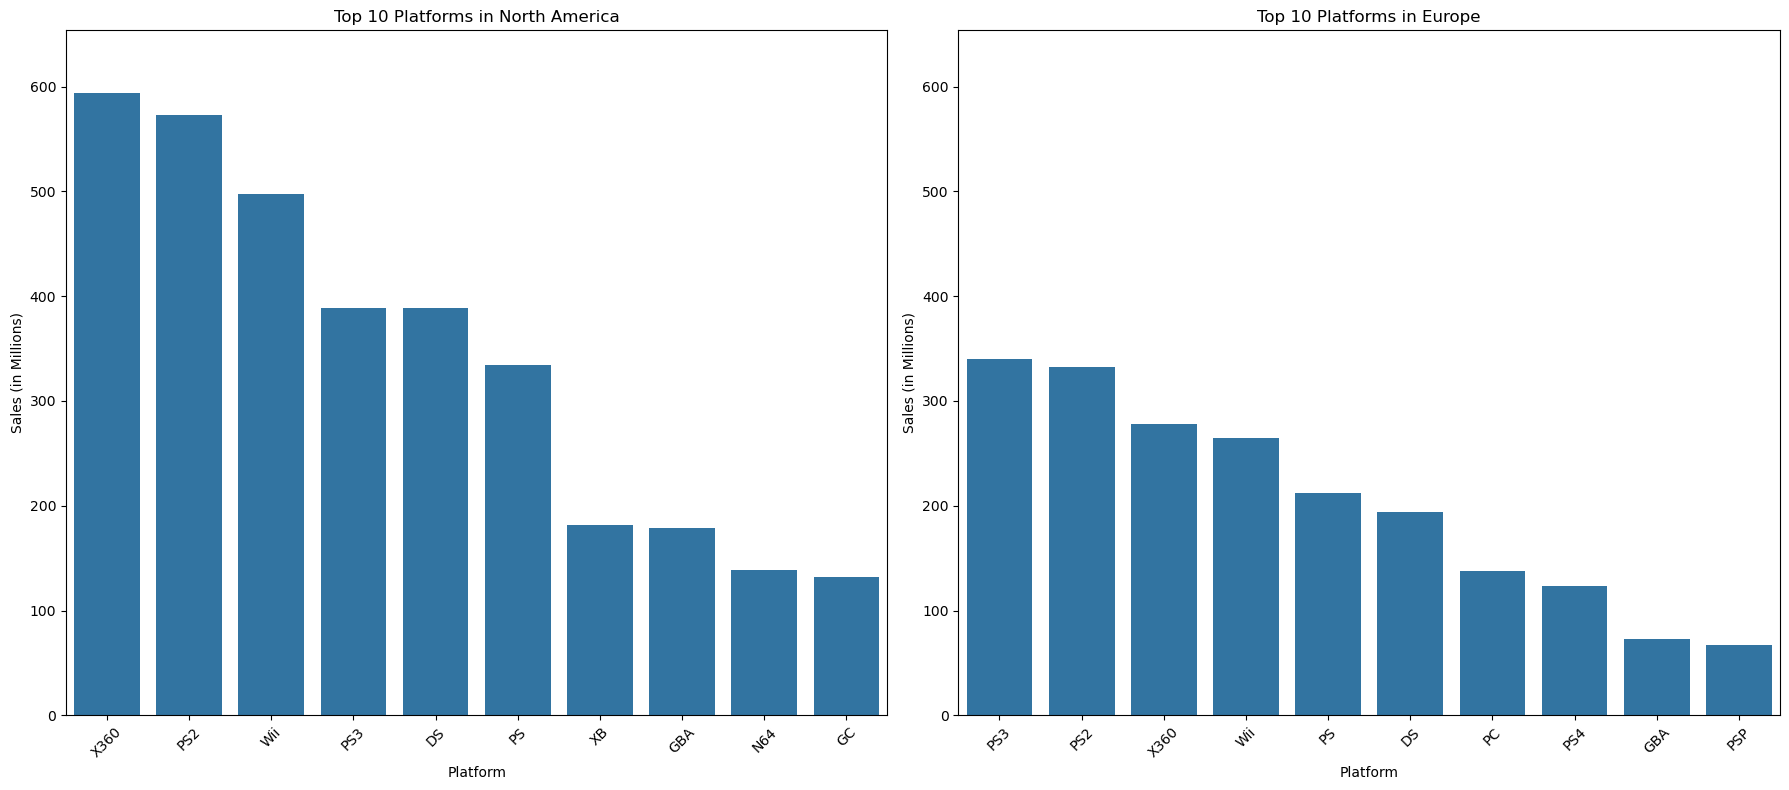

In [12]:
# Find the overall maximum sales value across both regions to set a common y-axis limit
# Add a little padding(10%) so the tallest bar doesn't touch the top of the chart
max_sales = max(na_platform_sales.max(), eu_platform_sales.max()) * 1.1 

# Create a figure with two subplots(side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(18,8))

# Plot for North America
sns.barplot(ax=axes[0], x=na_platform_sales.index, y=na_platform_sales.values)
axes[0].set_title('Top 10 Platforms in North America')
axes[0].set_ylabel('Sales (in Millions)')
axes[0].tick_params(axis='x', rotation=45) # Rotate labels for better readability
axes[0].set_ylim(0, max_sales)

# Plot for Europe
sns.barplot(ax=axes[1], x=eu_platform_sales.index, y=eu_platform_sales.values)
axes[1].set_title('Top 10 Platforms in Europe')
axes[1].set_ylabel('Sales (in Millions)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, max_sales)

#Display the plots
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

> **Conclusion for Q2:**
> The analysis of the top 10 best-selling platforms in North America and Europe reveals both shared global trends and distinct regional preferences.

> Shared Dominance: A key similarity is that the top six platforms are identical in both regions, merely in a different order (PS2, PS3, X360, Wii, DS, and PS). This highlights the massive global success of these particular console generations.

> Difference 1: The Battle for #1: The most significant difference lies at the very top. In North America, Microsoft's Xbox 360 is the clear market leader. In Europe, Sony's PlayStation 3 holds the top spot. This points to a strong regional preference, with the Xbox brand being more dominant in North America and PlayStation leading in Europe.

> Difference 2: Unique Market Tastes: The lower half of the top 10 shows different gaming cultures. The European list uniquely includes PC gaming, the modern PS4, and the handheld PSP, suggesting a diverse market with strong PC and portable gaming segments. The North American list, by contrast, features older successful home consoles like the original Xbox (XB), Nintendo 64 (N64), and GameCube (GC).

> Difference 3: Market Scale: The sales figures also indicate that the overall console market size in North America, as represented by these top platforms, is significantly larger than in Europe.

## Q3: How many games published by Nintendo are in the Top 100 best-selling games?

In [13]:
# First, get the top 100 best-selling games
df_sorted = df.sort_values(by='Global_Sales', ascending=False)
top_100_games = df_sorted.head(100)

# Second, from these 100 games, filter for those published by Nintendo
nintendo_in_top_100 = top_100_games[top_100_games['Publisher'] == 'Nintendo']

# Get the count
nintendo_game_count = len(nintendo_in_top_100)

# Display the list of these games
print(f"In the top 100 best-selling games, there are {nintendo_game_count} games published by Nintendo.")
print("\nHere is the list of those games:")

nintendo_in_top_100[['Name', 'Platform', 'Global_Sales']].reset_index(drop=True)


In the top 100 best-selling games, there are 52 games published by Nintendo.

Here is the list of those games:


,Name,Platform,Global_Sales
0,Wii Sports,Wii,82.74
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.82
3,Wii Sports Resort,Wii,33.00
4,Pokemon Red/Pokemon Blue,GB,31.37
5,Tetris,GB,30.26
6,New Super Mario Bros.,DS,30.01
7,Wii Play,Wii,29.02
8,New Super Mario Bros. Wii,Wii,28.62
9,Duck Hunt,NES,28.31


> **Conclusion for Q3:**
> By filtering the top 100 games by global sales, the analysis shows that 52 of them were published by Nintendo. This demonstrates Nintendo's significant presence and success in creating blockbuster titles that achieve massive global popularity.

## Q4: Is there a trend between the release year and global sales?

In [14]:
# Group sales data by year and sum them up
yearly_sales = df.groupby('Year')['Global_Sales'].sum().sort_index()

print("--- Total Global Sales by Year (in Millions) ---")
yearly_sales

--- Total Global Sales by Year (in Millions) ---


Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    414.01
2005    458.51
2006    521.04
2007    609.92
2008    678.90
2009    667.30
2010    600.29
2011    515.80
2012    363.49
2013    368.11
2014    337.03
2015    264.44
2016     70.90
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64

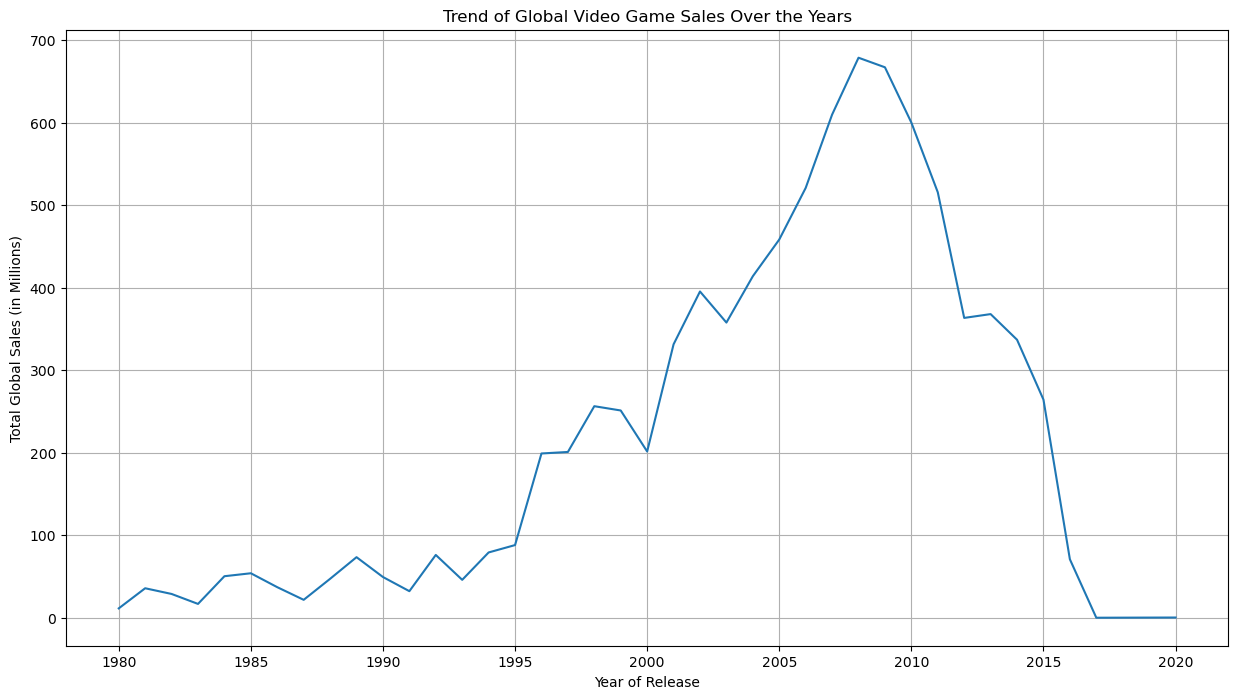

In [15]:
plt.figure(figsize=(15,8))

sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)

plt.title('Trend of Global Video Game Sales Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Global Sales (in Millions)')

plt.grid(True)
plt.show()

> **Conclusion for Q4:**
> The line plot clearly shows a distinct trend in the video game industry's global sales over the years. The history can be divided into several phases:

> The Early Years (Pre-2000s): The industry showed steady but relatively slow growth.

> The Growth/Golden Age (Approx. 2000-2008): This period witnessed an explosive growth in sales, reaching its peak around 2008. This coincides with the massive success of platforms like the PS2, Xbox 360, and Nintendo Wii.

> The Decline/Correction (Post-2008): After the peak, there is a noticeable downward trend in sales. 

> Important Note: The sharp drop in sales after approximately 2015 is likely due to the dataset being incomplete for the most recent years, rather than an actual market crash. The data was collected around 2016-2017, so data for those later years is not fully represented.